# Data Storytelling & Statistics
_Renaissance EXL_  
_Renaissance Learning, 2022_  
  
Now that we have some data and graphing powers to discover patterns and meaning in our data, it's time to start thinking about how we are going to share our discoveries with others.

## Today's Session

1. Housekeeping  
  
2. Data Storytelling
    - Story Arc
    - Understanding your audience
    - Notebook organization and markdown

3. Statistics I
    - Central tendency
    - Variance and standard deviation

4. Wrap up

## Housekeeping

### 3 Week Check In

We're a little over 1/3 of the way through the summer, and we'd like to quickly check in to find out how we're doing. Please take 5 minutes to complete the **3 Week Check-In Form** at the end of this session...

### Slack postings

Thanks to everyone who posted screen shots of your graphs and analysis in the `#python` Slack channel! 

We had few postings in the `#research` channel, so I believe that my request was not clear. An example of a post would be:

> I found three data sources, two from the Environmental Protection Agency, and one from a local city agency. I have to figure out how to combine these into a single data set, but now I have all of the data I need to answer my research question. My analysis is still early, but I saw a couple of patterns in increasing pollution levels that I want to dig into more. The hardest thing in my project so far is that I have a lot of data, and it's hard to decide which of it is useful and which of it should be filtered out.

Let's get some conversation going in the `#research` channel today and tomorrow.

## Data Storytelling

### Discuss with a partner

Think of one of your favorite books from childhood...  
- Who is the main character / protagonist?
- What challenge do they face?
- What do you like about the book?

Take 2 minutes each.  
After discussing, put the book name in our `#exl-summer-2022-cohort` channel.

### Elements of a good story

Good stories are memorable

- Use repeated language

- Fun, quirky, or bizarre

- Defy expectations

- Simple to share / re-tell

### Story Arc

#### Little Red Riding Hood - Powerpoint Edition

- Little Red Riding Hood (Red) has to walk 0.54 mi from Point A (home) to Point B (Grandma’s)

- Red meets Wolf, who (1) runs ahead to Grandma’s, (2) eats her, and (3) dresses in her clothes 

- Red arrives at Grandma’s at 2PM, asks her three questions

- Identified problem: after third question, Wolf eats Red

- Solution: vendor (Woodsman) employs tool (ax) 

- Expected outcome: Grandma and Red alive, wolf is not

![narrative arc](../images/narrative-arc)

![Little Red Riding Hood Arc](../images/little-red-riding-hood-arc.png)

### Understanding your audience

The same story can be adapted for different audiences...

<img src="../images/little-red-riding-hood.png" alt="Little Red Riding Hood" width="400"/>

<img src="../images/red-riding-hood.jpg.webp" alt="Red Riding Hood" width="400"/>

You will have to tell your data research story to 3 different audiences:

1. **Presentation:** General audience

2. **Paper:** Expert audience, but tell the story without code or exposing writing out all the math

3. **GitHub:** Job admissions - technical focus, all technical details on display

### Notebook Organization and Markdown

## Statistics I

Let's load the iris data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(csv_url, names = col_names)

print(iris.shape)
display(iris.head())

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Measures of Central Tendency

In [3]:
species = iris['species'].unique()
species

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

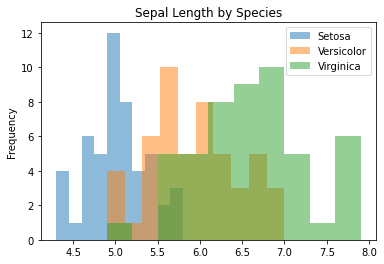

In [4]:
for s in species:
    
    short_name = s[5:].title()                   # remove "Iris-" by select the 6th letter to last
                                                 # then change to Title Case
    
    iris_species = iris[iris['species'] == s]    # subset of iris DataFrame
    
    iris_species['sepal_length'].plot.hist(
        bins=10,
        alpha=0.5,                               # "alpha" refers to the transparency of the color
        title='Sepal Length by Species',
        label=short_name,
        legend=True
    );
    

Let's look at the Virginica species

In [5]:
virginica = iris[iris['species'] == 'Iris-virginica']
virginica.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
139,6.9,3.1,5.4,2.1,Iris-virginica
128,6.4,2.8,5.6,2.1,Iris-virginica
115,6.4,3.2,5.3,2.3,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
133,6.3,2.8,5.1,1.5,Iris-virginica
119,6.0,2.2,5.0,1.5,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica


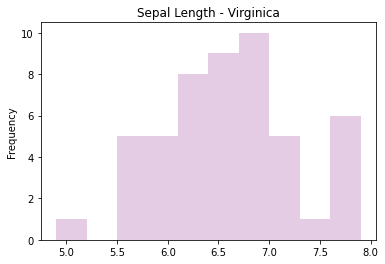

In [6]:
virginica['sepal_length'].plot.hist(
    bins=10, 
    title='Sepal Length - Virginica',
    color='purple', 
    alpha=0.2
);

#### Discuss with a partner: 

- Where is the *middle* of this dataset?
- What are some ways we can describe the middle?

- Mean
- Median
- Mode

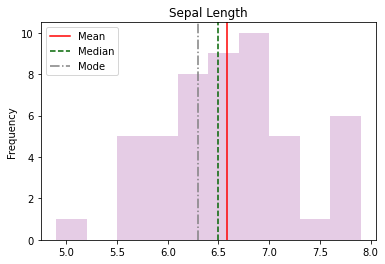

In [7]:
_mean = virginica['sepal_length'].mean()
_median = virginica['sepal_length'].median()
_mode = virginica['sepal_length'].mode()[0]

# main plot
virginica['sepal_length'].plot.hist(
    bins=10, 
    title='Sepal Length',
    color='purple',
    alpha=0.2,
    label='_nolegend_'     # hide from legend
)

# draw mean, median, and mode as vertical lines
plt.axvline(x=_mean, color='red', linestyle='-', label='Mean')
plt.axvline(x=_median, color='darkgreen', linestyle='--', label='Median')
plt.axvline(x=_mode, color='grey', linestyle='-.', label='Mode')

# add a legend for the lines
plt.legend(loc=2);

### Why so many stats?

Take 5 minutes to discuss with a partner and post your answers in Slack:
> What is an advantage or disadvantage of using...
> - Mean
> - Median
> - Mode



### Variance and Standard Deviation

[103. 103. 105. 108.  95. 100. 107.  88. 111. 126.  90.  97.  91. 107.
  94. 111. 107. 117. 112.  84. 105.  86. 102.  95.  84. 109.  87.  93.
 116. 105.]


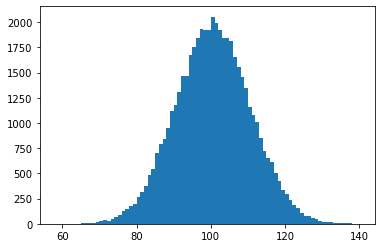

In [8]:
import numpy as np

mean = 100
std = 10

s = np.rint(np.random.normal(100, 10, 50000))
print(s[:30])

bins = int(s.max() - s.min())
plt.hist(x=s, bins=bins);

<AxesSubplot:ylabel='Count'>

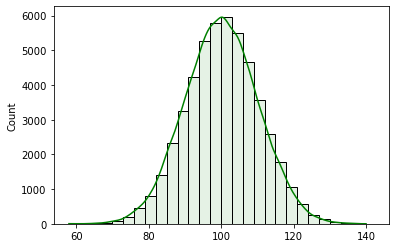

In [9]:
import seaborn as sns
sns.histplot(s, bins=bins, color='green', binwidth=3, alpha=0.1, kde=True)

## Wrap Up

### Todos

1. **Do Now:** [3 Week Check-In](https://forms.gle/JYdYx2feNg3XUGhr5)

2. Post an update on your research project in the `#research` channel

3. Post a screenshot of your statistical analysis in the `#python` channel

4. Reply to at least 2 others' postings
    - A question about the project
    - A suggestion
    - Anything else you want to say!

5. Read more: 
    - [Measures of central tendency](https://www.scribbr.com/statistics/central-tendency/)